<a href="https://colab.research.google.com/github/pkalyan607/Website/blob/main/McDonald_s_case_study_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import math
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


mcdonalds = pd.read_csv('mcdonalds')
mcdonalds.keys()
columns= list(mcdonalds.columns)
columns


['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [6]:
df = pd.DataFrame(mcdonalds, columns= mcdonalds.keys())
Extracted_df= df.iloc[:,0:11]
Extracted_df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [8]:
mapping = {"Yes": 1, "No": 0}

# Iterate over each column in the DataFrame
for column in Extracted_df.columns:
    # Check if the column has "Yes" and "No" values
    if set(Extracted_df[column].unique()) == {"Yes", "No"}:
        # Map "Yes" and "No" to 1 and 0
        Extracted_df[column] = Extracted_df[column].map(mapping)

# Print the updated DataFrame
print(Extracted_df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

In [9]:
Extracted_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [10]:
pca = PCA(n_components=11)
pca_components = pca.fit_transform(Extracted_df)
df_pca=pd.DataFrame(data=pca_components,columns=['PC1' ,'PC2' , 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [12]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [13]:
# Print summary of PCA
print("Standard deviations:")
print(pca.explained_variance_)
print("\nProportion of variance:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Standard deviations:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


<ipython-input-14-18c3010d92fe>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_components [:, 0], pca_components [:, 1],  cmap='plasma')


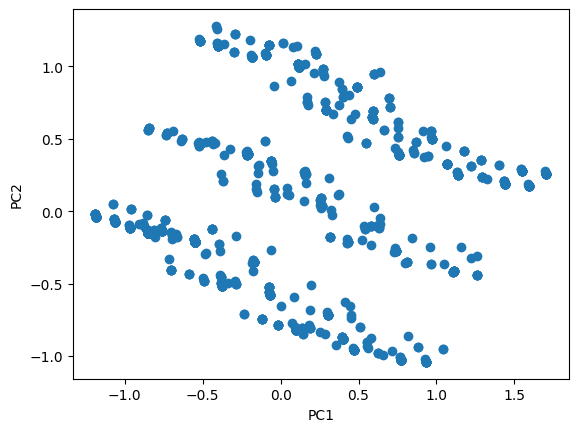

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.37593402  0.5

In [14]:
# transformed data plotting
plt.scatter(pca_components [:, 0], pca_components [:, 1],  cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

# Projection Axes
projection_axes = pca.components_
print(projection_axes)

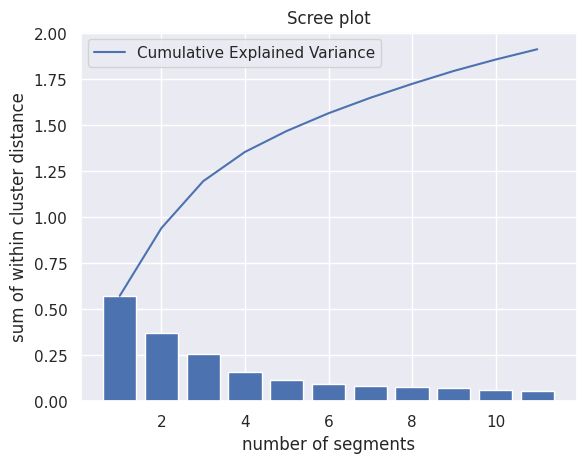

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 

plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distance')
plt.title('Scree plot')
 
plt.show()

In [16]:
pip install bioinfokit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58647 sha256=f7a11d9ca58118a307bbb26ad0fb7fa6c2c6aae2077267ef281c3328bdc1594c
  Stored in directory: /root/.cache/pip/wheels/f8/6e/14/26f84dc04734d9b4614f1a74154aba345568d65c0c145c6543
Successfully built bioinfokit


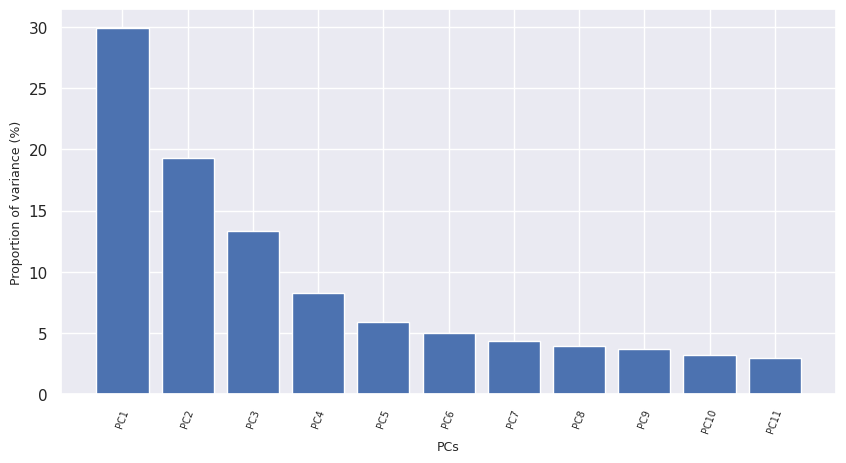

In [17]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[df_pca.columns, pca.explained_variance_ratio_],show=True,dim=(10,5))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

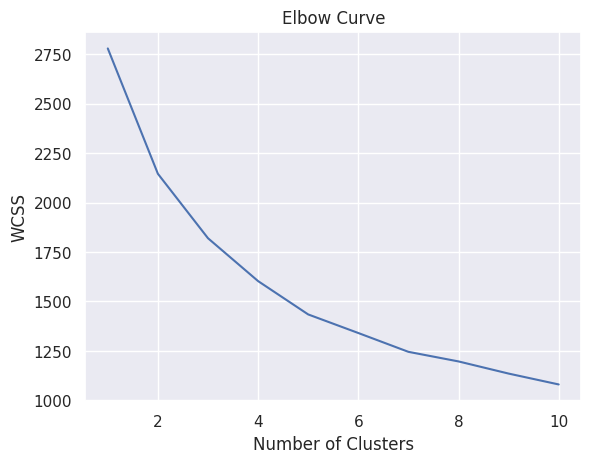

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have your data stored in a DataFrame called 'df'
# Modify the following line with your actual data

# Using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create a KMeans object
kmeans2 = KMeans()

# Create a KElbowVisualizer object
visualizer = KElbowVisualizer(kmeans2, k=(1, 10))

# Fit the KMeans object to the Extracted_df data
visualizer.fit(df_pca)

# Show the plot
visualizer.show()

In [26]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [27]:
df_segm_pca_kmeans= pd.concat([Extracted_df,pd.DataFrame({'cluster':kmeans_pca.labels_})],axis=1)
df_segm_pca_kmeans

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,2
1451,1,1,0,0,0,1,1,1,0,1,0,0


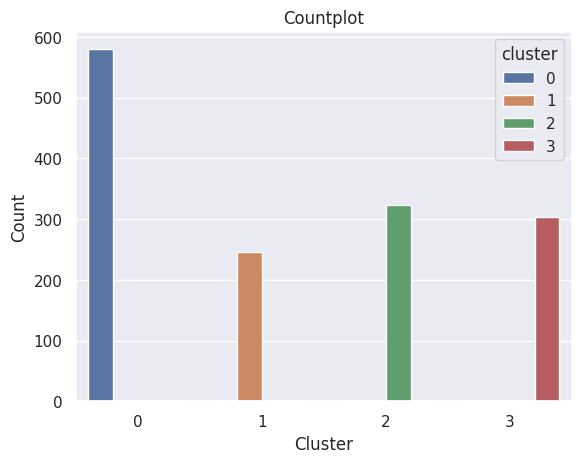

In [28]:
sns.countplot(data=df_segm_pca_kmeans, x='cluster', hue='cluster')

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Countplot')

# Display the plot
plt.show()

In [29]:
df_segm_pca_kmeans['cluster'].value_counts(normalize=True)*100

0    39.917412
2    22.229869
3    20.922230
1    16.930489
Name: cluster, dtype: float64

In [30]:
# Filter the DataFrame for cluster 
cluster1_analysis = df_segm_pca_kmeans[df_segm_pca_kmeans['cluster'] == 0]

print(cluster1_analysis.head())

    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
3       1           1      0          1       1     1      1      1   
5       1           1      0          1       0     1      1      1   
7       1           1      0          1       1     1      1      1   
15      1           1      0          1       0     1      1      1   
16      1           1      0          1       1     1      1      1   

    expensive  healthy  disgusting  cluster  
3           0        0           1        0  
5           0        0           0        0  
7           0        0           0        0  
15          0        0           0        0  
16          0        0           0        0  


<ipython-input-31-6e5e1112db58>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")


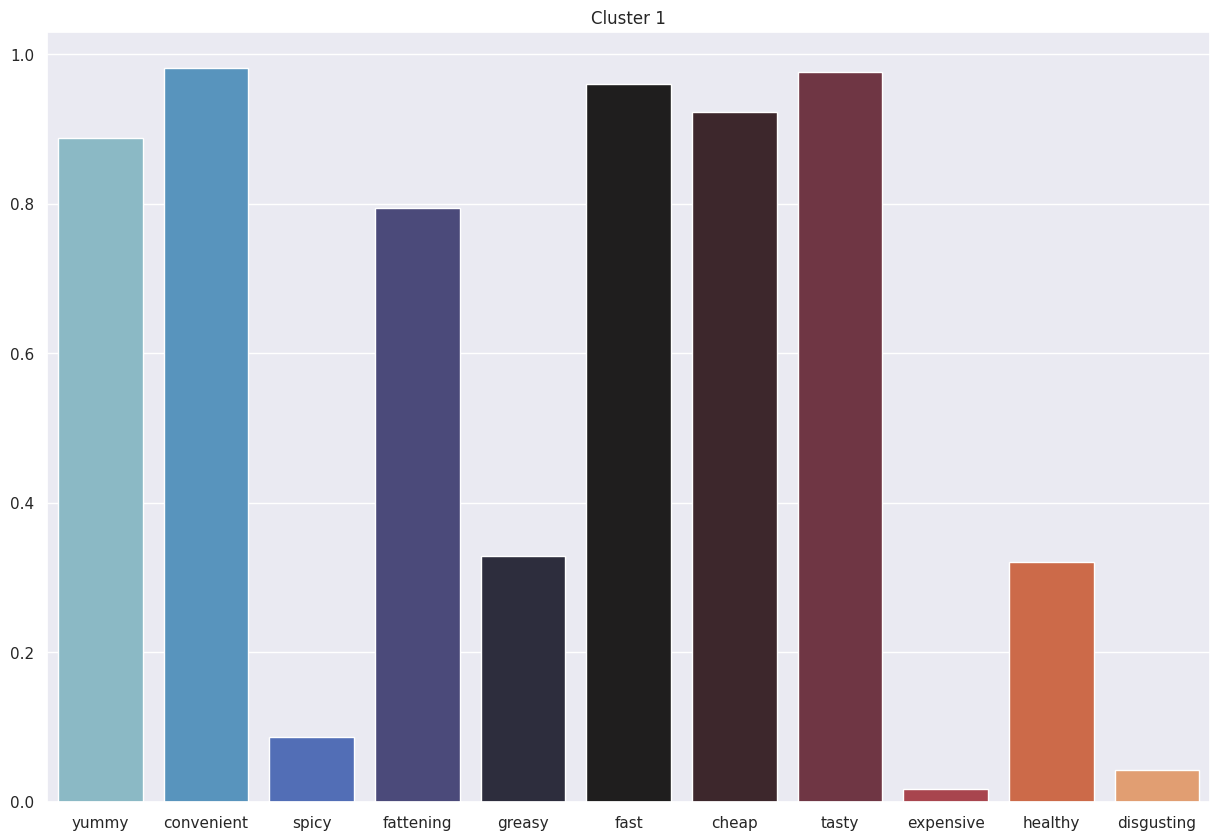

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(data=cluster1_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")
plt.title('Cluster 1')

plt.show()

<ipython-input-32-3b2b84ac1272>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster2_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")


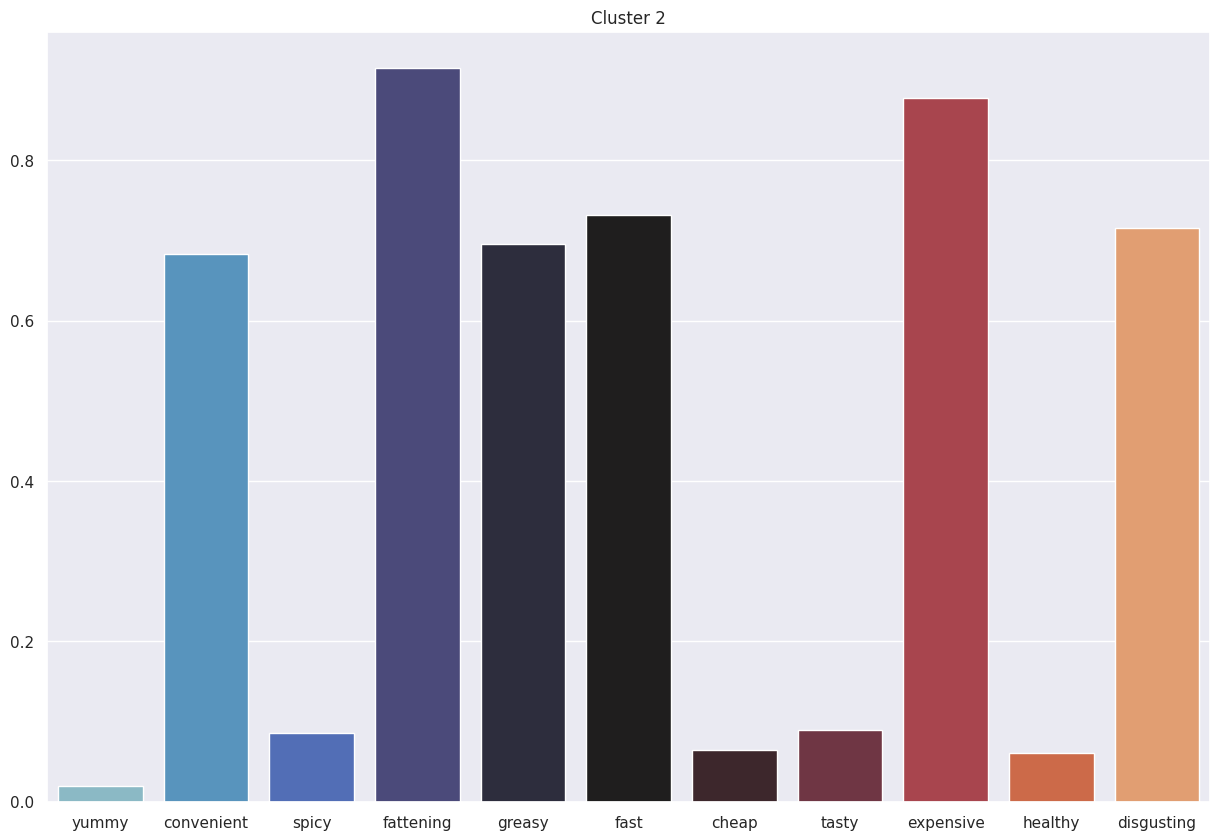

In [32]:
cluster2_analysis = df_segm_pca_kmeans[df_segm_pca_kmeans['cluster'] == 1]

plt.figure(figsize=(15, 10))
sns.barplot(data=cluster2_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")
plt.title('Cluster 2')

plt.show()


<ipython-input-33-fe4501a25599>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")


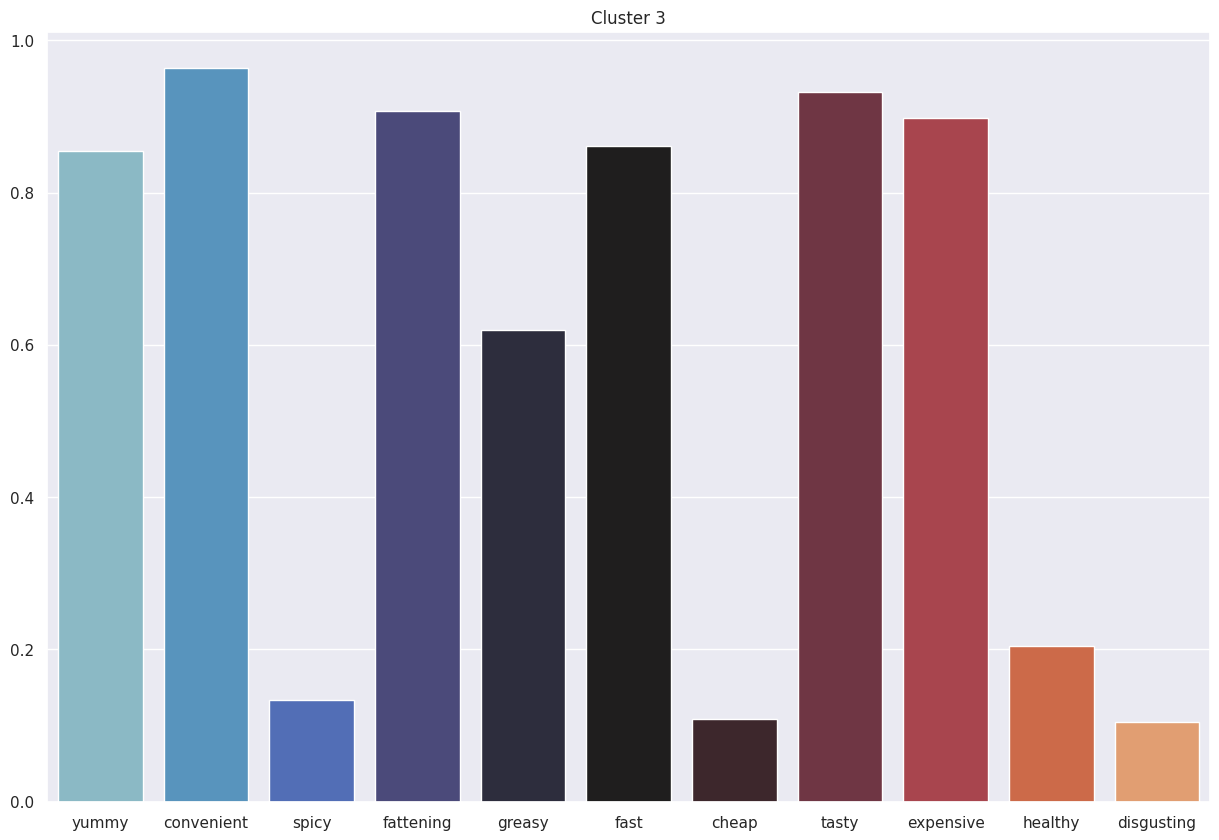

In [33]:
cluster3_analysis = df_segm_pca_kmeans[df_segm_pca_kmeans['cluster'] == 2]

plt.figure(figsize=(15, 10))
sns.barplot(data=cluster3_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")
plt.title('Cluster 3')

plt.show()
     

<ipython-input-35-09231cc10178>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")


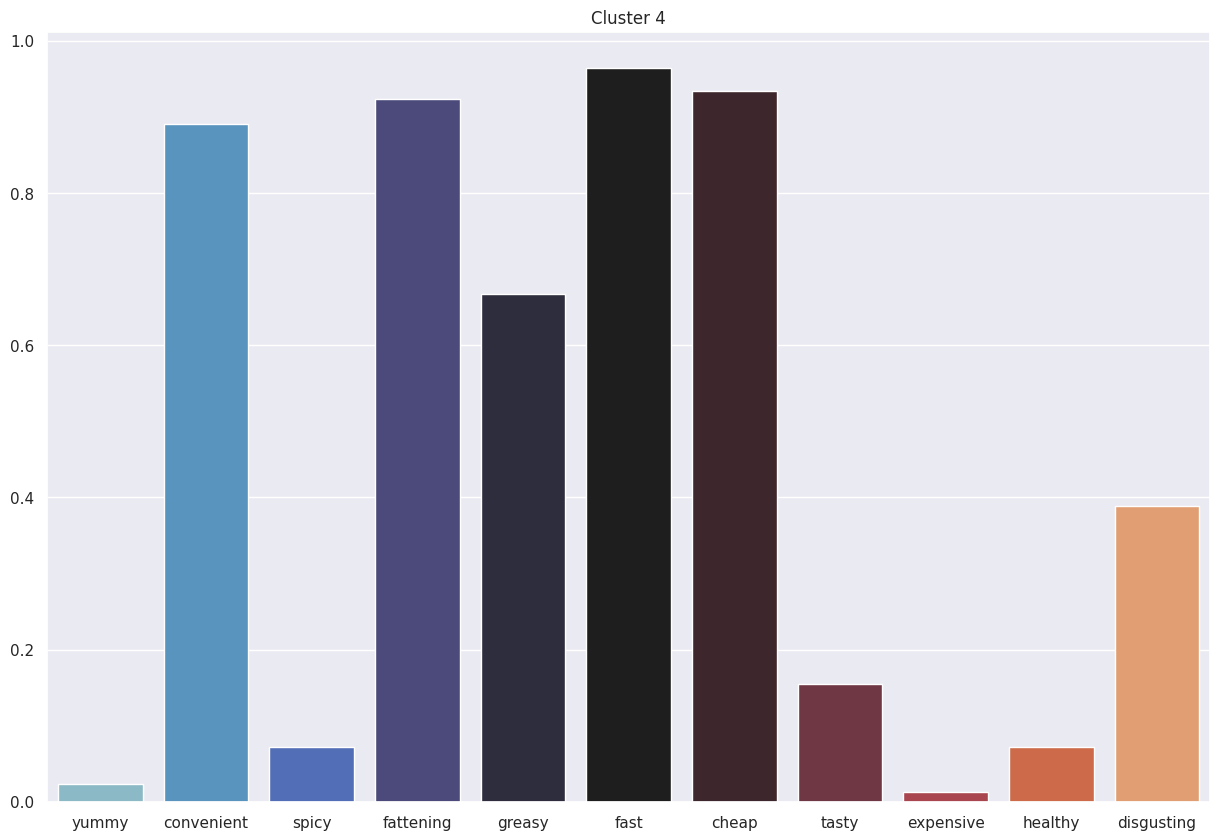

In [35]:
cluster4_analysis = df_segm_pca_kmeans[df_segm_pca_kmeans['cluster'] == 3]

plt.figure(figsize=(15, 10))
sns.barplot(data=cluster4_analysis[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None, palette="icefire")
plt.title('Cluster 4')

plt.show()

In [36]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [37]:
mapping = {"Yes": 1, "No": 0}

# Iterate over each column in the DataFrame
for column in Extracted_df.columns:
    # Check if the column has "Yes" and "No" values
    if set(df[column].unique()) == {"Yes", "No"}:
        # Map "Yes" and "No" to 1 and 0
        df[column] = df[column].map(mapping)

# Print the updated DataFrame
print(df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting          Like  Age      VisitFrequency  \
0             1        0           0        

In [38]:
df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,Every three months,Male
1452,0,1,0,1,1,0,0,0,1,0,1,2,30,Every three months,Male


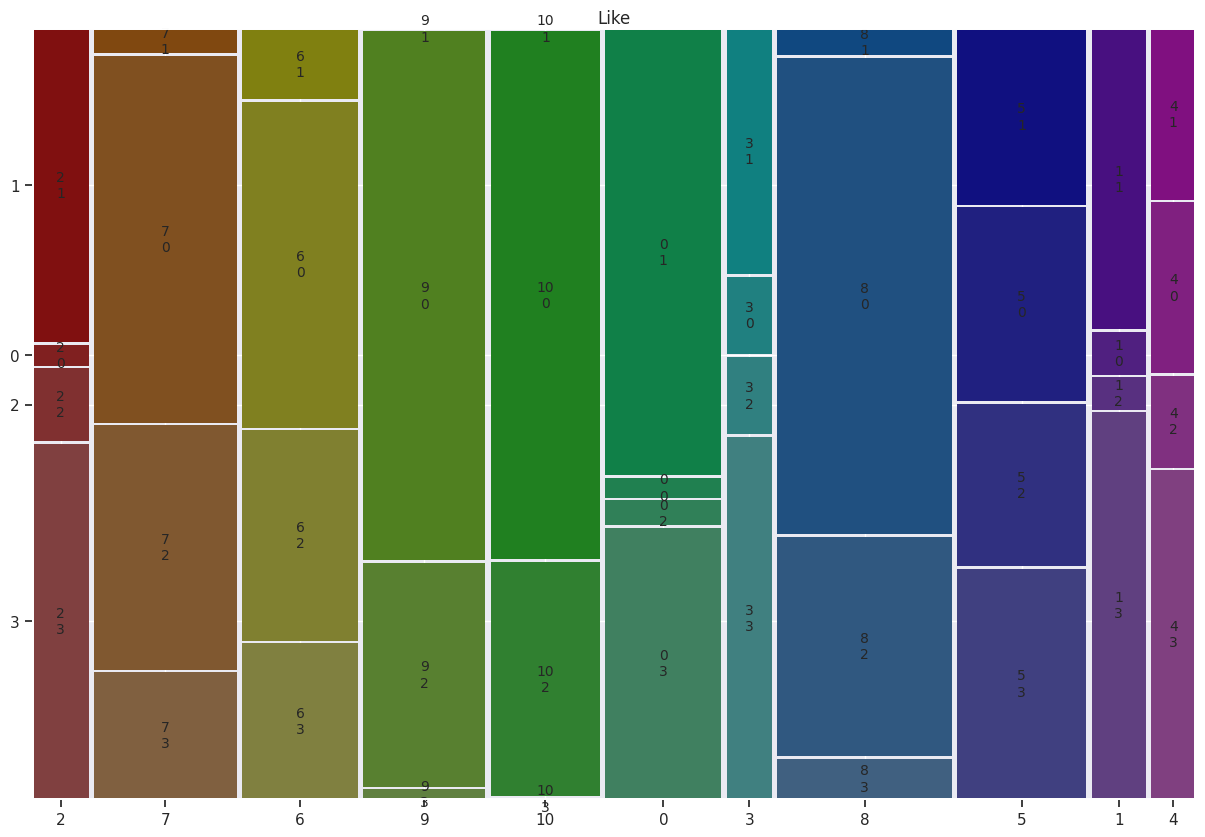

In [39]:
from statsmodels.graphics.mosaicplot import mosaic

df1 = pd.concat([df,pd.DataFrame({'cluster':kmeans_pca.labels_})],axis=1)
plt.rcParams['figure.figsize']=(15,10)
mosaic(df1,['Like','cluster'])
plt.xlabel('Like')
plt.show()

In [40]:
df1['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [41]:
df1['Gender'] = df1['Gender'].replace({'Female':0, 'Male': 1})

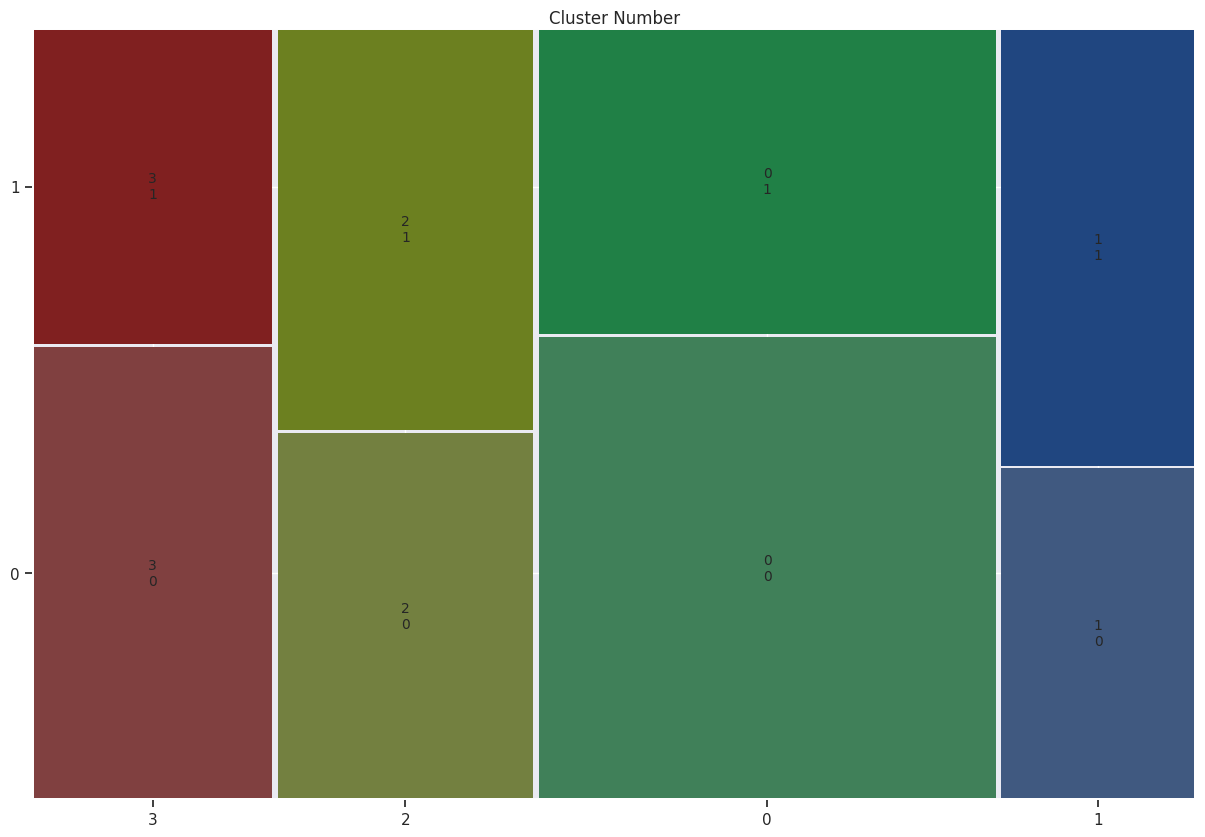

In [42]:
mosaic(df1,['cluster','Gender'])
plt.xlabel('Cluster Number')
plt.show()

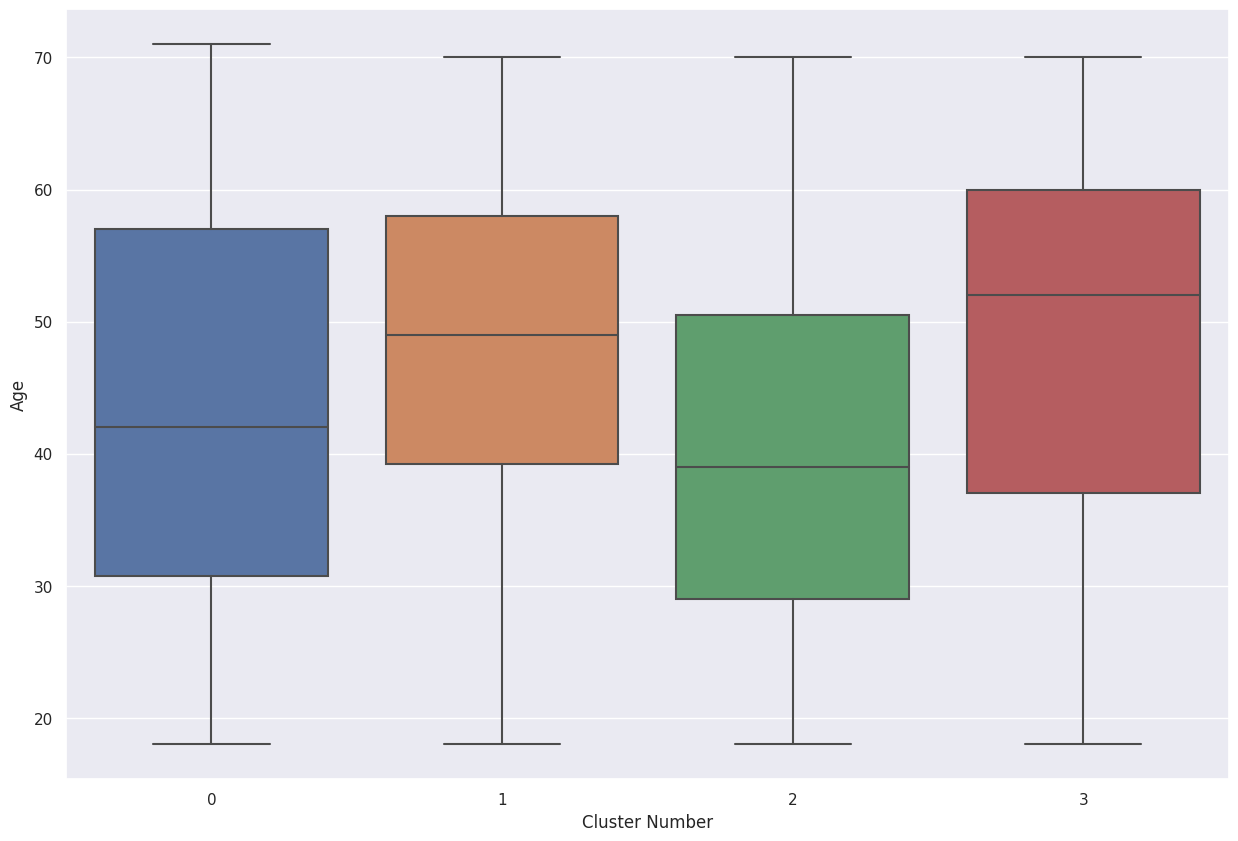

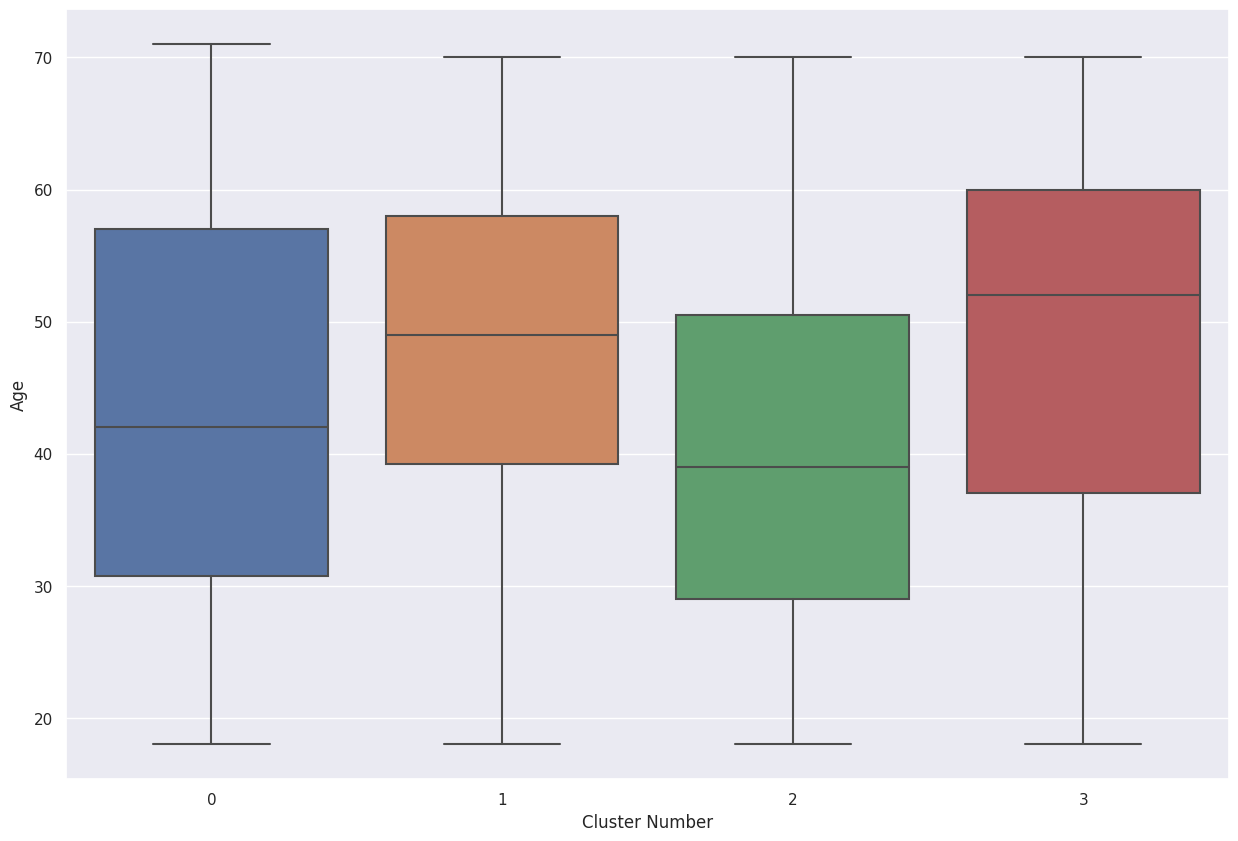

In [45]:
sns.boxplot(x=df1['cluster'], y=df1['Age'])
plt.xlabel('Cluster Number')
plt.show()

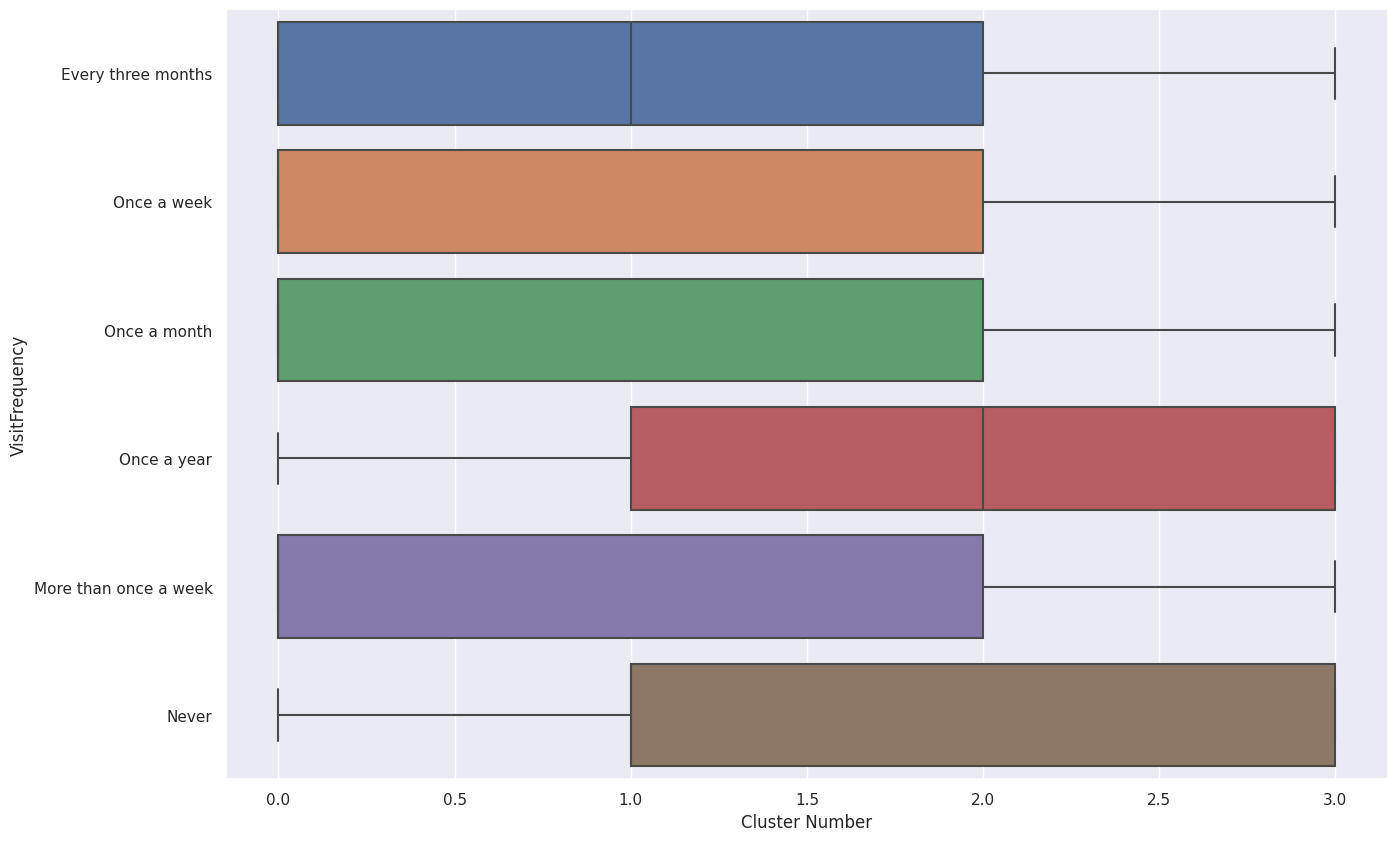

In [44]:
sns.boxplot(x=df1['cluster'], y=df1['VisitFrequency'])
plt.xlabel('Cluster Number')
plt.show()
     

In [46]:
df1['VisitFrequency'] = df1['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})
df1.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,4,0,3
1,1,1,0,1,1,1,1,1,1,0,0,7,51,4,0,2
2,0,1,1,1,1,1,0,1,1,1,0,6,62,4,0,2
3,1,1,0,1,1,1,1,1,0,0,1,9,69,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,3


In [48]:
from sklearn.model_selection import train_test_split

X = df1.drop(['cluster'],axis=1)
y = df1[['cluster']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=1234)
model = decision_tree.fit(X, y)


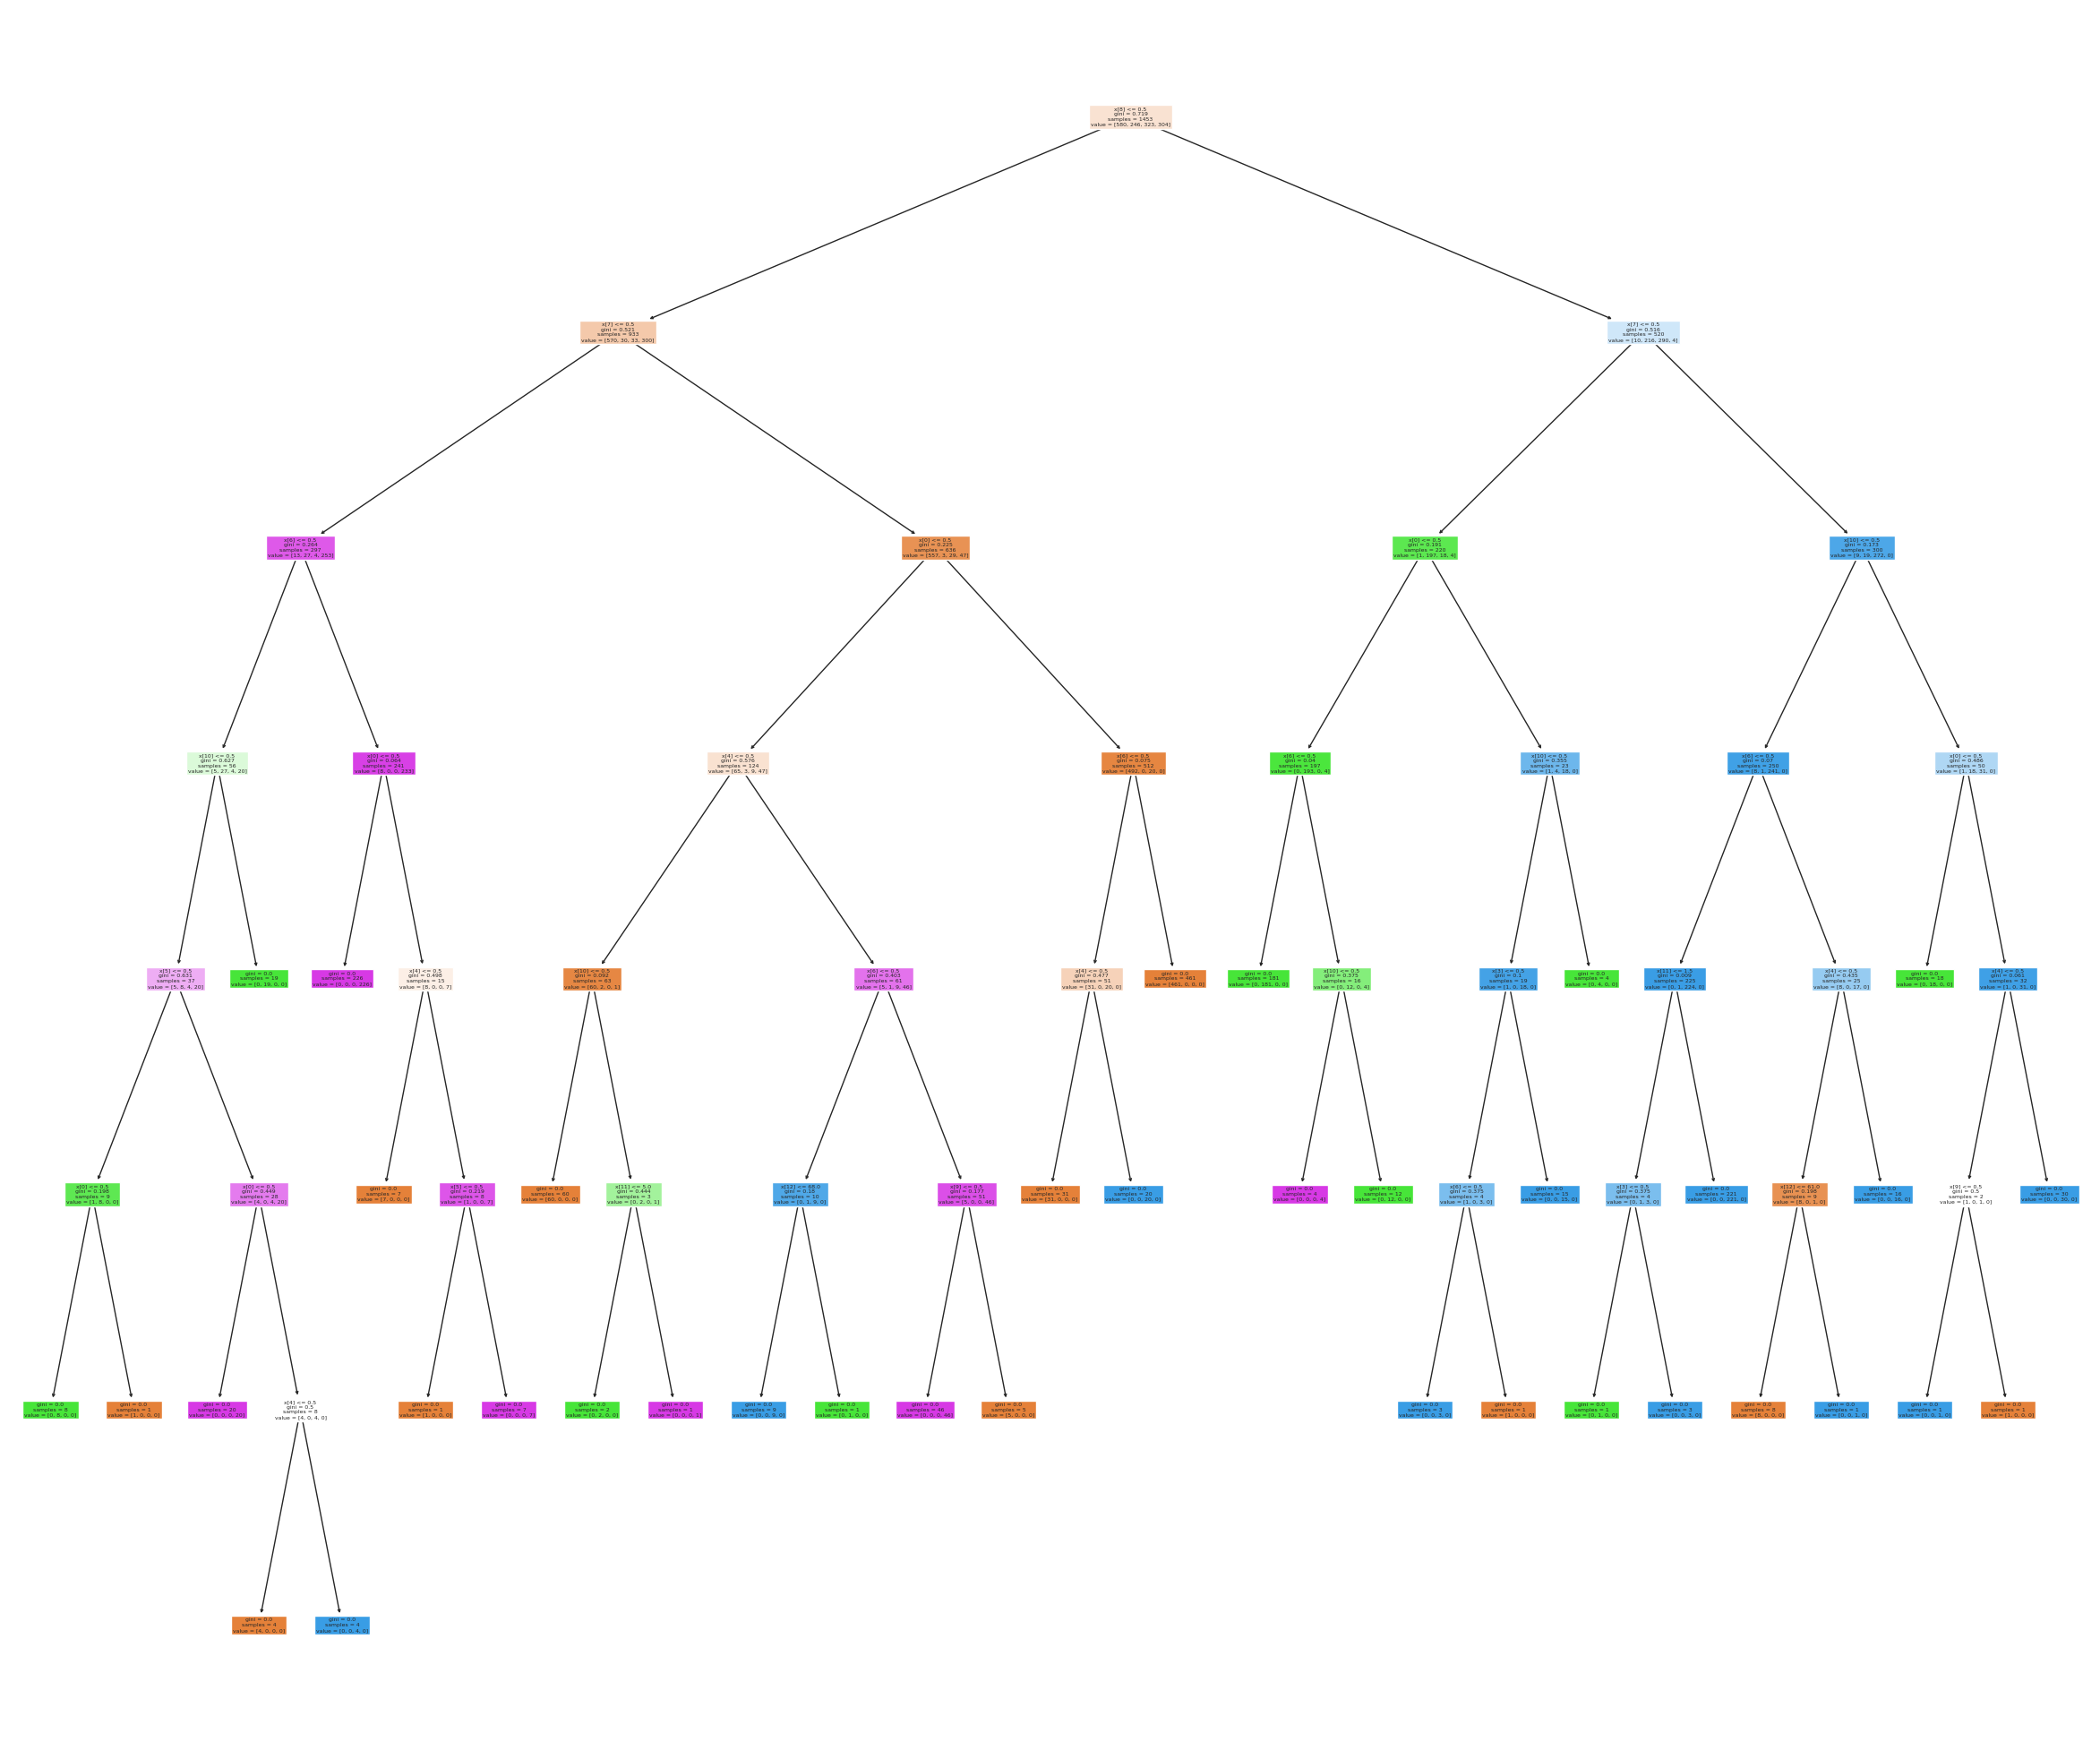

In [50]:
from sklearn import tree
fig = plt.figure(figsize=(30,25))
Tree = tree.plot_tree(decision_tree, filled=True)

In [51]:
import pickle
pickle.dump(decision_tree, open('model2.pkl','wb'))

In [52]:
loaded_model = pickle.load(open('model2.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result,'% Acuuracy')

1.0 % Acuuracy
